### 2012-AlexNet CNN with Keras:
Deep Learning Models Implementations
Dataset Source: https://keras.io/api/datasets/cifar10/
- Classes : 10 {0,1,2,3,4,5,6,7,8,9}
  - Classes 								
          1. airplane
          2. automobile
          3. bird
          4. cat										
          5. deer										
          6. dog										
          7. frog										
          8. horse										
          9. ship										
          10. truck
- Dataset shape :10000 images
- Image shape : 32 * 32 * 3 (RGB)
- Problem type : Image Classification

In [1]:
#https://analyticsindiamag.com/hands-on-guide-to-implementing-alexnet-with-keras-for-multi-class-image-classification/
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


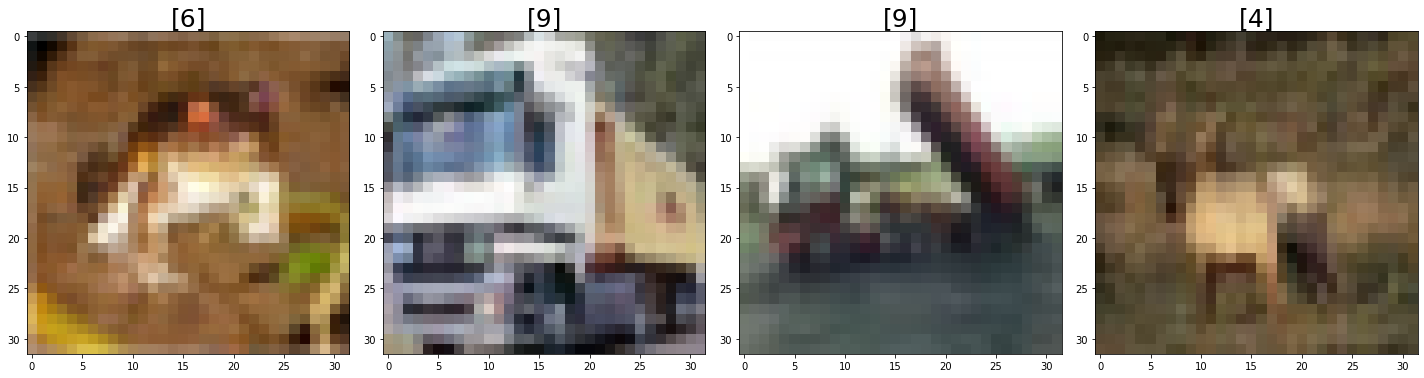

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.tight_layout()
    plt.imshow(x_train[i])
    plt.title(y_train[i],size = (25))
plt.show()

In [3]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [4]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))


((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [5]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [6]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

In [7]:
#Defining the parameters
batch_size= 100
epochs=100
learn_rate=.001

 Model Additional Features :
      
      1. Activation : Relu
      2. Dropout
      3. Local Response Normalization 
          - BatchNormalization is replace lrn
      4. Pooling
      5. Augmention
      6. GPU's 

In [8]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#3rd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#Output Layer
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [9]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

In [10]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])#epochs#

In [11]:
model.fit(
        x=x_train,
        y=y_train,
        epochs = epochs,
        #callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)],
        validation_data=(x_val, y_val),
        verbose=True)
#model.fit(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps = 250, callbacks = [lrr], verbose=1)

Epoch 1/100
1094/1094 [==============================] - 19s 15ms/step - loss: 1.8297 - accuracy: 0.3308 - val_loss: 1.9437 - val_accuracy: 0.3207
Epoch 2/100
1094/1094 [==============================] - 16s 14ms/step - loss: 1.4495 - accuracy: 0.4837 - val_loss: 2.2260 - val_accuracy: 0.3025
Epoch 3/100
1094/1094 [==============================] - 16s 15ms/step - loss: 1.3104 - accuracy: 0.5375 - val_loss: 1.4304 - val_accuracy: 0.5116
Epoch 4/100
1094/1094 [==============================] - 16s 15ms/step - loss: 1.1914 - accuracy: 0.5860 - val_loss: 1.3355 - val_accuracy: 0.5389
Epoch 5/100
1094/1094 [==============================] - 16s 15ms/step - loss: 1.1008 - accuracy: 0.6212 - val_loss: 1.6156 - val_accuracy: 0.4573
Epoch 6/100
1094/1094 [==============================] - 16s 15ms/step - loss: 0.9931 - accuracy: 0.6605 - val_loss: 1.1973 - val_accuracy: 0.5811
Epoch 7/100
1094/1094 [==============================] - 16s 15ms/step - loss: 0.8960 - accuracy: 0.6955 - val_loss: 1

<Figure size 1440x1080 with 0 Axes>

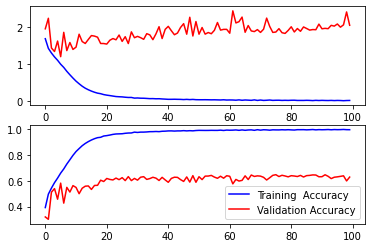

In [12]:
#After successful training, we will visualize its performance.
import matplotlib.pyplot as plt
#Plotting the training and validation loss
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

# Loss
# Accuracy

In [14]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


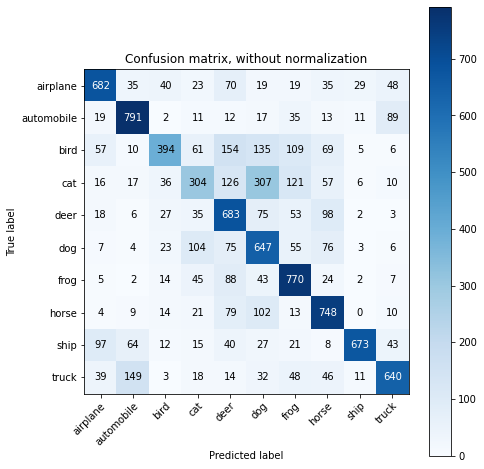

In [15]:
#Making prediction
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')


While checking for each classes it shows high correlation towords each class with some fluctuations around surrounding classes.


Normalized confusion matrix


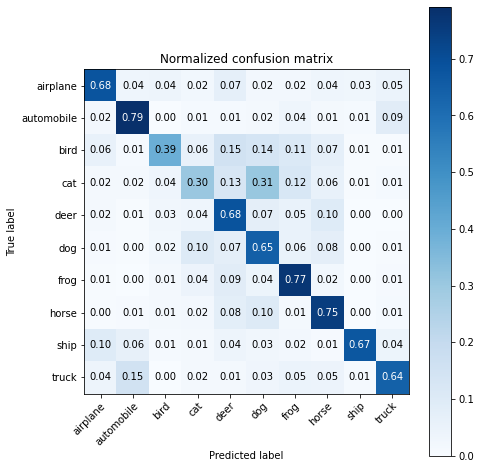

In [16]:
# Plotting normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')   


*  As cat and bird are to main classes where correlationing showing less values.

*  Other than this classes shows good results as above 0.60%



In [17]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.6332


predict set values 

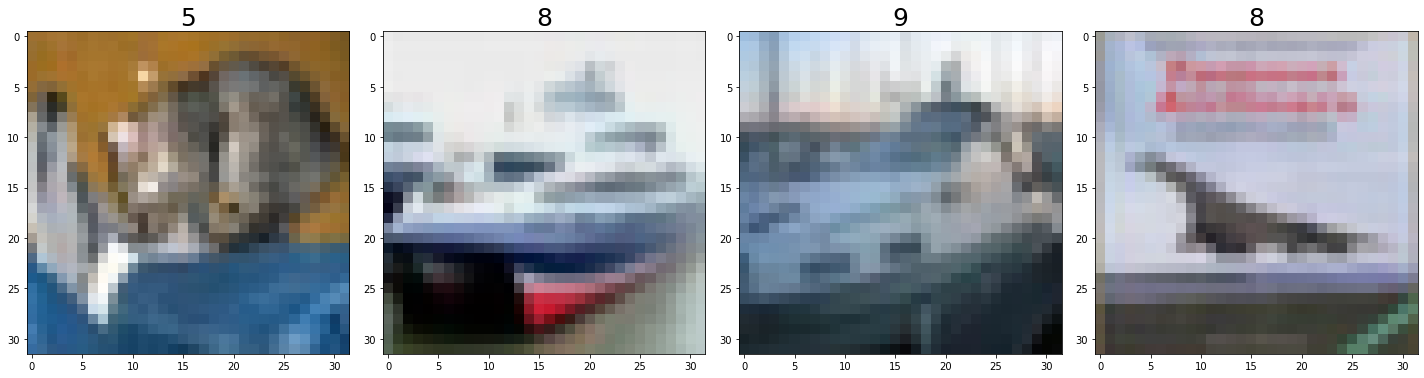

In [22]:
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.tight_layout()
    plt.imshow(x_test[i])
    plt.title(y_pred[i],size = (25))
plt.show()

test set values

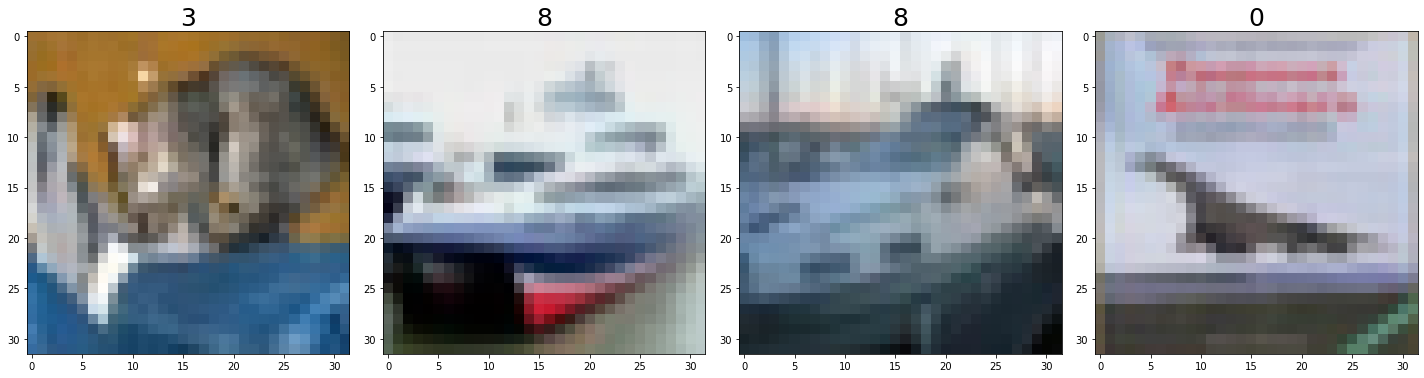

In [28]:
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.tight_layout()
    plt.imshow(x_test[i])
    plt.title(np.argmax(y_test[i]),size = (25))
plt.show()



> Training accuracy: 0.9925 

> Training loss: 0.0237 

> Validation Accuracy score :  0.6277

> Validation Loss : 2.0386

> Predictions : Not as we expected as we might need more amount of data or more layer training.

> Work's good for memorization but not as good as generalization 





